In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### User Recipe

In [2]:
user_recipe = pd.read_csv("../data/food/user_recipe.csv")
user_recipe.head()

,user_id,recipe_id,rating,dateLastModified
0,39,61727,4,2001-03-26T07:36:16.653\n
1,39,7612,5,2004-08-02T16:48:37.107\n
2,39,12009,4,2001-02-28T10:37:25.59\n
3,39,88185,5,2009-05-18T14:55:11.517\n
4,39,24445,5,2015-05-07T15:42:20.32\n


In [3]:
user_recipe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151148 entries, 0 to 151147
Data columns (total 4 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   user_id           151148 non-null  int64 
 1   recipe_id         151148 non-null  int64 
 2   rating            151148 non-null  int64 
 3   dateLastModified  151148 non-null  object
dtypes: int64(3), object(1)
memory usage: 4.6+ MB


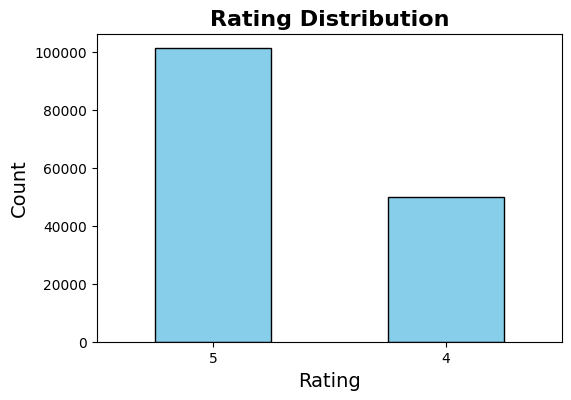

In [4]:
ax = user_recipe['rating'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black', figsize=(6,4))

ax.set_title("Rating Distribution", fontsize=16, fontweight='bold')
ax.set_xlabel("Rating", fontsize=14)
ax.set_ylabel("Count", fontsize=14)

ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha='center')

plt.show()

In [5]:
user_recipe['datetime'] = pd.to_datetime(user_recipe['dateLastModified'])

In [6]:
user_recipe.head(2)

,user_id,recipe_id,rating,dateLastModified,datetime
0,39,61727,4,2001-03-26T07:36:16.653\n,2001-03-26 07:36:16.653
1,39,7612,5,2004-08-02T16:48:37.107\n,2004-08-02 16:48:37.107


In [7]:
user_recipe['year'] = user_recipe['datetime'].dt.year
user_recipe['month'] = user_recipe['datetime'].dt.month
user_recipe['day'] = user_recipe['datetime'].dt.day
user_recipe['hour'] = user_recipe['datetime'].dt.hour

In [8]:
user_recipe.head(3)

,user_id,recipe_id,rating,dateLastModified,datetime,year,month,day,hour
0,39,61727,4,2001-03-26T07:36:16.653\n,2001-03-26 07:36:16.653,2001,3,26,7
1,39,7612,5,2004-08-02T16:48:37.107\n,2004-08-02 16:48:37.107,2004,8,2,16
2,39,12009,4,2001-02-28T10:37:25.59\n,2001-02-28 10:37:25.590,2001,2,28,10


In [9]:
user_recipe.drop(['dateLastModified', 'datetime'], axis=1, inplace=True)

In [10]:
user_recipe.head()

,user_id,recipe_id,rating,year,month,day,hour
0,39,61727,4,2001,3,26,7
1,39,7612,5,2004,8,2,16
2,39,12009,4,2001,2,28,10
3,39,88185,5,2009,5,18,14
4,39,24445,5,2015,5,7,15


In [11]:
user_recipe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151148 entries, 0 to 151147
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype
---  ------     --------------   -----
 0   user_id    151148 non-null  int64
 1   recipe_id  151148 non-null  int64
 2   rating     151148 non-null  int64
 3   year       151148 non-null  int64
 4   month      151148 non-null  int64
 5   day        151148 non-null  int64
 6   hour       151148 non-null  int64
dtypes: int64(7)
memory usage: 8.1 MB


### Recipe

In [12]:
recipe = pd.read_csv("../data/food/recipe.csv")
recipe.head()

,recipe_id,recipe_name,review_nums,category,aver_rate,image_url,ingredients,cooking_directions,nutritions,reviews,tags
0,6698,Mom's Zucchini Bread,9355,appetizer,4.754207,https://images.media-allrecipes.com/userphotos...,all-purpose flour^salt^baking soda^baking powd...,{'directions': u'Prep\n20 m\nCook\n1 h\nReady ...,"{u'niacin': {u'hasCompleteData': True, u'name'...","{9568256: {'rating': 5, 'followersCount': 0, '...",north-american;breads;easy;beginner-cook;inexp...
1,6709,Zucchini Walnut Bread,58,appetizer,4.478873,http://images.media-allrecipes.com/userphotos/...,chopped walnuts^eggs^white sugar^vegetable oil...,"{'directions': u'Whisk together flour, baking ...","{u'niacin': {u'hasCompleteData': True, u'name'...","{1636096: {'rating': 4, 'followersCount': 0, '...",weeknight;breads;fruit;vegetables;kid-friendly...
2,6725,Honey Wheat Bread I,2054,appetizer,4.766846,http://images.media-allrecipes.com/userphotos/...,rapid rise yeast^white sugar^warm water (110 d...,{'directions': u'Prep\n25 m\nCook\n35 m\nReady...,"{u'niacin': {u'hasCompleteData': True, u'name'...","{1542146: {'rating': 4, 'followersCount': 56, ...",healthy;breads;dietary;low-cholesterol;healthy...
3,6730,Chocolate Chip Orange Zucchini Bread,503,dessert,4.674833,https://images.media-allrecipes.com/userphotos...,eggs^white sugar^vegetable oil^vanilla extract...,"{'directions': u'Sift together flour, baking p...","{u'niacin': {u'hasCompleteData': True, u'name'...","{1978376: {'rating': 5, 'followersCount': 0, '...",for-large-groups;healthy;breads;kid-friendly;d...
4,6732,Chocolate Chip Pumpkin Bread,866,dessert,4.718112,https://images.media-allrecipes.com/userphotos...,white sugar^pumpkin puree^vegetable oil^water^...,{'directions': u'Prep\n30 m\nCook\n1 h\nReady ...,"{u'niacin': {u'hasCompleteData': True, u'name'...","{1830917: {'rating': 3, 'followersCount': 0, '...",breads;fall;winter;seasonal;quick-breads;4-hou...


In [13]:
recipe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7280 entries, 0 to 7279
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   recipe_id           7280 non-null   int64  
 1   recipe_name         7280 non-null   object 
 2   review_nums         7280 non-null   int64  
 3   category            7280 non-null   object 
 4   aver_rate           7280 non-null   float64
 5   image_url           7280 non-null   object 
 6   ingredients         7280 non-null   object 
 7   cooking_directions  7280 non-null   object 
 8   nutritions          7280 non-null   object 
 9   reviews             7280 non-null   object 
 10  tags                7278 non-null   object 
dtypes: float64(1), int64(2), object(8)
memory usage: 625.8+ KB


In [14]:
# Dropping some columns
columns_to_drop = ['review_nums', 'image_url', 'reviews']

recipe.drop(columns_to_drop, axis=1, inplace=True)

In [15]:
recipe.head(2)

,recipe_id,recipe_name,category,aver_rate,ingredients,cooking_directions,nutritions,tags
0,6698,Mom's Zucchini Bread,appetizer,4.754207,all-purpose flour^salt^baking soda^baking powd...,{'directions': u'Prep\n20 m\nCook\n1 h\nReady ...,"{u'niacin': {u'hasCompleteData': True, u'name'...",north-american;breads;easy;beginner-cook;inexp...
1,6709,Zucchini Walnut Bread,appetizer,4.478873,chopped walnuts^eggs^white sugar^vegetable oil...,"{'directions': u'Whisk together flour, baking ...","{u'niacin': {u'hasCompleteData': True, u'name'...",weeknight;breads;fruit;vegetables;kid-friendly...


In [16]:
recipe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7280 entries, 0 to 7279
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   recipe_id           7280 non-null   int64  
 1   recipe_name         7280 non-null   object 
 2   category            7280 non-null   object 
 3   aver_rate           7280 non-null   float64
 4   ingredients         7280 non-null   object 
 5   cooking_directions  7280 non-null   object 
 6   nutritions          7280 non-null   object 
 7   tags                7278 non-null   object 
dtypes: float64(1), int64(1), object(6)
memory usage: 455.1+ KB


**Category**

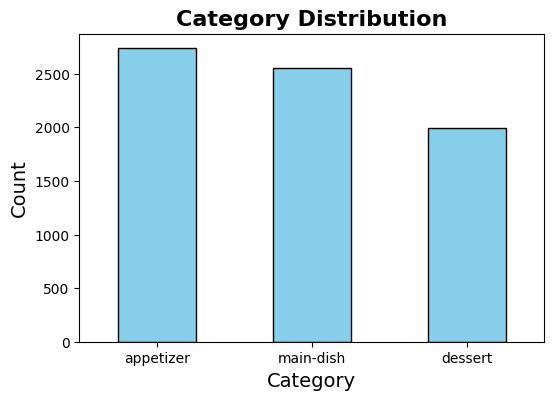

In [17]:
ax = recipe['category'].value_counts().plot(kind='bar', color='skyblue', edgecolor='black', figsize=(6,4))

ax.set_title("Category Distribution", fontsize=16, fontweight='bold')
ax.set_xlabel("Category", fontsize=14)
ax.set_ylabel("Count", fontsize=14)

ax.set_xticklabels(ax.get_xticklabels(), rotation=0, ha='center')

plt.show()

**Ingredients**

In [18]:
ingredient_sample = recipe['ingredients'][0]
ingredient_sample

'all-purpose flour^salt^baking soda^baking powder^ground cinnamon^eggs^vegetable oil^white sugar^vanilla extract^grated zucchini^chopped walnuts'

In [19]:
ingredient_sample = ingredient_sample.split('^')
ingredient_sample

['all-purpose flour',
 'salt',
 'baking soda',
 'baking powder',
 'ground cinnamon',
 'eggs',
 'vegetable oil',
 'white sugar',
 'vanilla extract',
 'grated zucchini',
 'chopped walnuts']

In [20]:
from collections import Counter

all_ingredients = list(item for recipe in recipe['ingredients'] for item in recipe.split('^'))
counter = Counter(all_ingredients)

unique_ingredients = set(all_ingredients)
total_ingredients = len(unique_ingredients)

In [21]:
total_ingredients

8765

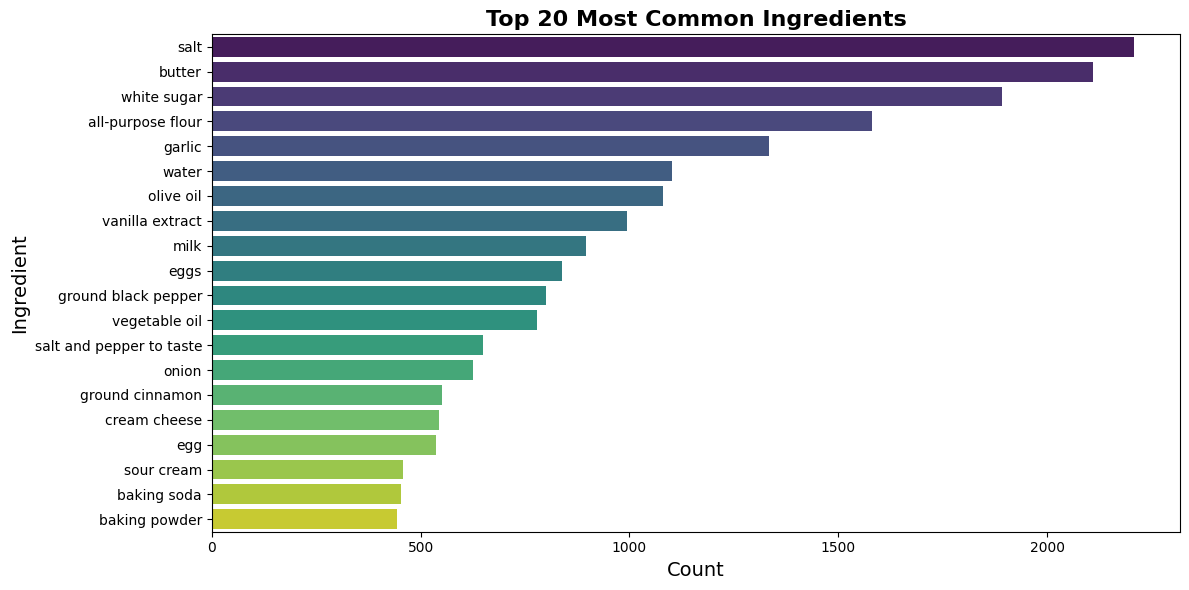

In [22]:
top_ingredients = counter.most_common(20)
items, counts = zip(*top_ingredients)

plt.figure(figsize=(12, 6))
sns.barplot(x=list(counts), y=list(items), palette='viridis')

plt.title('Top 20 Most Common Ingredients', fontsize=16, fontweight='bold')
plt.xlabel('Count', fontsize=14)
plt.ylabel('Ingredient', fontsize=14)

plt.tight_layout()

plt.show()

In [23]:
def convert_ingredients(items):
    return items.split('^')

In [24]:
recipe['ingredients'] = recipe['ingredients'].apply(convert_ingredients)

In [25]:
recipe.head(3)

,recipe_id,recipe_name,category,aver_rate,ingredients,cooking_directions,nutritions,tags
0,6698,Mom's Zucchini Bread,appetizer,4.754207,"[all-purpose flour, salt, baking soda, baking ...",{'directions': u'Prep\n20 m\nCook\n1 h\nReady ...,"{u'niacin': {u'hasCompleteData': True, u'name'...",north-american;breads;easy;beginner-cook;inexp...
1,6709,Zucchini Walnut Bread,appetizer,4.478873,"[chopped walnuts, eggs, white sugar, vegetable...","{'directions': u'Whisk together flour, baking ...","{u'niacin': {u'hasCompleteData': True, u'name'...",weeknight;breads;fruit;vegetables;kid-friendly...
2,6725,Honey Wheat Bread I,appetizer,4.766846,"[rapid rise yeast, white sugar, warm water (11...",{'directions': u'Prep\n25 m\nCook\n35 m\nReady...,"{u'niacin': {u'hasCompleteData': True, u'name'...",healthy;breads;dietary;low-cholesterol;healthy...


**Cooking Directions**

In [26]:
cooking_dir_sample = recipe['cooking_directions'][0]
cooking_dir_sample

"{'directions': u'Prep\\n20 m\\nCook\\n1 h\\nReady In\\n1 h 40 m\\nGrease and flour two 8 x 4 inch pans. Preheat oven to 325 degrees F (165 degrees C).\\nSift flour, salt, baking powder, soda, and cinnamon together in a bowl.\\nBeat eggs, oil, vanilla, and sugar together in a large bowl. Add sifted ingredients to the creamed mixture, and beat well. Stir in zucchini and nuts until well combined. Pour batter into prepared pans.\\nBake for 40 to 60 minutes, or until tester inserted in the center comes out clean. Cool in pan on rack for 20 minutes. Remove bread from pan, and completely cool.'}"

In [27]:
import re

# Extract the directions part of the string
directions_str = re.search(r"'directions': u'(.*?)'", cooking_dir_sample).group(1)

# Replace special sequences with a single delimiter for easier splitting
directions_str = directions_str.replace('\\n', '\n')

# Split the directions string into a list based on newlines and periods
instructions = re.split(r'\n|(?<!\w\.\w.)(?<![A-Z][a-z]\.)(?<=\.|\?)\s', directions_str)

# Remove any empty strings and strip leading/trailing whitespace
instructions = [instr.strip() for instr in instructions if instr.strip()]

instructions

['Prep',
 '20 m',
 'Cook',
 '1 h',
 'Ready In',
 '1 h 40 m',
 'Grease and flour two 8 x 4 inch pans.',
 'Preheat oven to 325 degrees F (165 degrees C).',
 'Sift flour, salt, baking powder, soda, and cinnamon together in a bowl.',
 'Beat eggs, oil, vanilla, and sugar together in a large bowl.',
 'Add sifted ingredients to the creamed mixture, and beat well.',
 'Stir in zucchini and nuts until well combined.',
 'Pour batter into prepared pans.',
 'Bake for 40 to 60 minutes, or until tester inserted in the center comes out clean.',
 'Cool in pan on rack for 20 minutes.',
 'Remove bread from pan, and completely cool.']

In [28]:
def preprocess_cooking_dir(cooking_direction):
    match = re.search(r"'directions': u'(.*?)'", cooking_direction)
    if match:
        directions_str = match.group(1)
        directions_str = directions_str.replace('\\n', '\n')
        instructions = re.split(r'\n|(?<!\w\.\w.)(?<![A-Z][a-z]\.)(?<=\.|\?)\s', directions_str)
        instructions = [instr.strip() for instr in instructions if instr.strip()]
        return instructions
    else:
        return []

In [29]:
recipe['cooking_directions'] = recipe['cooking_directions'].apply(preprocess_cooking_dir)

In [30]:
recipe.head(3)

,recipe_id,recipe_name,category,aver_rate,ingredients,cooking_directions,nutritions,tags
0,6698,Mom's Zucchini Bread,appetizer,4.754207,"[all-purpose flour, salt, baking soda, baking ...","[Prep, 20 m, Cook, 1 h, Ready In, 1 h 40 m, Gr...","{u'niacin': {u'hasCompleteData': True, u'name'...",north-american;breads;easy;beginner-cook;inexp...
1,6709,Zucchini Walnut Bread,appetizer,4.478873,"[chopped walnuts, eggs, white sugar, vegetable...","[Whisk together flour, baking soda, salt, cinn...","{u'niacin': {u'hasCompleteData': True, u'name'...",weeknight;breads;fruit;vegetables;kid-friendly...
2,6725,Honey Wheat Bread I,appetizer,4.766846,"[rapid rise yeast, white sugar, warm water (11...","[Prep, 25 m, Cook, 35 m, Ready In, 2 h 30 m, D...","{u'niacin': {u'hasCompleteData': True, u'name'...",healthy;breads;dietary;low-cholesterol;healthy...


**Nutritions**

In [31]:
recipe['nutritions'][0]

"{u'niacin': {u'hasCompleteData': True, u'name': u'Niacin Equivalents', u'amount': 1.685838, u'percentDailyValue': u'13', u'displayValue': u'2', u'unit': u'mg'}, u'sugars': {u'hasCompleteData': True, u'name': u'Sugars', u'amount': 19.18834, u'percentDailyValue': u'0', u'displayValue': u'19.2', u'unit': u'g'}, u'sodium': {u'hasCompleteData': True, u'name': u'Sodium', u'amount': 179.8308, u'percentDailyValue': u'7', u'displayValue': u'180', u'unit': u'mg'}, u'carbohydrates': {u'hasCompleteData': True, u'name': u'Carbohydrates', u'amount': 32.05494, u'percentDailyValue': u'10', u'displayValue': u'32.1', u'unit': u'g'}, u'vitaminB6': {u'hasCompleteData': True, u'name': u'Vitamin B6', u'amount': 0.06311467, u'percentDailyValue': u'4', u'displayValue': u'< 1', u'unit': u'mg'}, u'calories': {u'hasCompleteData': True, u'name': u'Calories', u'amount': 255.1692, u'percentDailyValue': u'13', u'displayValue': u'255', u'unit': u'kcal'}, u'thiamin': {u'hasCompleteData': True, u'name': u'Thiamin', u'

In [32]:
import ast

def preprocess_nutritions(nutrition_str):
    nutrition_dict = ast.literal_eval(nutrition_str)
    
    preprocessed_data = {}
    for key, value in nutrition_dict.items():
        preprocessed_data[key] = value.get('amount', 0)

    return preprocessed_data

In [33]:
recipe['nutritions'] = recipe['nutritions'].apply(preprocess_nutritions)

In [34]:
recipe.head(3)

,recipe_id,recipe_name,category,aver_rate,ingredients,cooking_directions,nutritions,tags
0,6698,Mom's Zucchini Bread,appetizer,4.754207,"[all-purpose flour, salt, baking soda, baking ...","[Prep, 20 m, Cook, 1 h, Ready In, 1 h 40 m, Gr...","{'niacin': 1.685838, 'sugars': 19.18834, 'sodi...",north-american;breads;easy;beginner-cook;inexp...
1,6709,Zucchini Walnut Bread,appetizer,4.478873,"[chopped walnuts, eggs, white sugar, vegetable...","[Whisk together flour, baking soda, salt, cinn...","{'niacin': 2.043781, 'sugars': 20.65618, 'sodi...",weeknight;breads;fruit;vegetables;kid-friendly...
2,6725,Honey Wheat Bread I,appetizer,4.766846,"[rapid rise yeast, white sugar, warm water (11...","[Prep, 25 m, Cook, 35 m, Ready In, 2 h 30 m, D...","{'niacin': 3.099195, 'sugars': 4.749415, 'sodi...",healthy;breads;dietary;low-cholesterol;healthy...


In [35]:
all_nutritions = set(item for nutritions in recipe['nutritions'] for item in nutritions.keys())
total_nutritions = len(all_nutritions)

total_nutritions

20

In [37]:
def nutrition_values(nutrition):
    nutrition_list = []
    for key, value in nutrition.items():
        nutrition_list.append(nutrition.get(key, 0))
    return nutrition_list

In [41]:
recipe['nutritions'] = recipe['nutritions'].apply(nutrition_values)

In [53]:
recipe.head(3)

,recipe_id,recipe_name,category,aver_rate,ingredients,cooking_directions,nutritions,tags
0,6698,Mom's Zucchini Bread,appetizer,4.754207,"[all-purpose flour, salt, baking soda, baking ...","[Prep, 20 m, Cook, 1 h, Ready In, 1 h 40 m, Gr...","[1.685838, 19.18834, 179.8308, 32.05494, 0.063...","[north-american, breads, easy, beginner-cook, ..."
1,6709,Zucchini Walnut Bread,appetizer,4.478873,"[chopped walnuts, eggs, white sugar, vegetable...","[Whisk together flour, baking soda, salt, cinn...","[2.043781, 20.65618, 253.0008, 36.54568, 0.077...","[weeknight, breads, fruit, vegetables, kid-fri..."
2,6725,Honey Wheat Bread I,appetizer,4.766846,"[rapid rise yeast, white sugar, warm water (11...","[Prep, 25 m, Cook, 35 m, Ready In, 2 h 30 m, D...","[3.099195, 4.749415, 218.6528, 24.45452, 0.053...","[healthy, breads, dietary, low-cholesterol, he..."


**Tags**

In [43]:
recipe['tags'][0]

'north-american;breads;easy;beginner-cook;inexpensive;quick-breads;3-steps-or-less;4-hours-or-less'

In [45]:
recipe['tags'][0].split(';')

['north-american',
 'breads',
 'easy',
 'beginner-cook',
 'inexpensive',
 'quick-breads',
 '3-steps-or-less',
 '4-hours-or-less']

In [49]:
def return_tags(tags):
    tags = str(tags)
    return tags.split(';')

In [51]:
recipe['tags'] = recipe['tags'].apply(return_tags)

In [52]:
recipe.head()

,recipe_id,recipe_name,category,aver_rate,ingredients,cooking_directions,nutritions,tags
0,6698,Mom's Zucchini Bread,appetizer,4.754207,"[all-purpose flour, salt, baking soda, baking ...","[Prep, 20 m, Cook, 1 h, Ready In, 1 h 40 m, Gr...","[1.685838, 19.18834, 179.8308, 32.05494, 0.063...","[north-american, breads, easy, beginner-cook, ..."
1,6709,Zucchini Walnut Bread,appetizer,4.478873,"[chopped walnuts, eggs, white sugar, vegetable...","[Whisk together flour, baking soda, salt, cinn...","[2.043781, 20.65618, 253.0008, 36.54568, 0.077...","[weeknight, breads, fruit, vegetables, kid-fri..."
2,6725,Honey Wheat Bread I,appetizer,4.766846,"[rapid rise yeast, white sugar, warm water (11...","[Prep, 25 m, Cook, 35 m, Ready In, 2 h 30 m, D...","[3.099195, 4.749415, 218.6528, 24.45452, 0.053...","[healthy, breads, dietary, low-cholesterol, he..."
3,6730,Chocolate Chip Orange Zucchini Bread,dessert,4.674833,"[eggs, white sugar, vegetable oil, vanilla ext...","[Sift together flour, baking powder, soda, sal...","[1.787187, 1.343123, 165.3506, 34.2574, 20.929...","[for-large-groups, healthy, breads, kid-friend..."
4,6732,Chocolate Chip Pumpkin Bread,dessert,4.718112,"[white sugar, pumpkin puree, vegetable oil, wa...","[Prep, 30 m, Cook, 1 h, Ready In, 1 h 30 m, Pr...","[1.339834, 19.85458, 204.1061, 30.47, 0.031029...","[breads, fall, winter, seasonal, quick-breads,..."


### Merging the dataset

In [54]:
merged_data = user_recipe.merge(recipe, on='recipe_id', how='left')

In [55]:
merged_data.head()

,user_id,recipe_id,rating,year,month,day,hour,recipe_name,category,aver_rate,ingredients,cooking_directions,nutritions,tags
0,39,61727,4,2001,3,26,7,Ten Minute Enchilada Sauce,main-dish,4.439774,"[vegetable oil, self-rising flour, New Mexico,...","[Prep, 10 m, Cook, 15 m, Ready In, 25 m, Heat ...","[1.057699, 1.901137, 408.3739, 7.002383, 0.236...","[15-minutes-or-less, north-american, sauces, c..."
1,39,7612,5,2004,8,2,16,Chocolate Lovers' Favorite Cake,dessert,4.683846,"[devil's food cake mix, instant chocolate pudd...","[Prep, 30 m, Cook, 1 h, Ready In, 2 h, Preheat...","[2.117175, 40.40503, 608.3894, 57.70967, 0.047...","[for-large-groups, desserts, oven, cakes, choc..."
2,39,12009,4,2001,2,28,10,Cajun Chicken Pasta,main-dish,4.676716,"[linguine pasta, boneless skinless chicken bre...","[Prep, 15 m, Cook, 15 m, Ready In, 30 m, Bring...","[25.5405, 5.582606, 1134.194, 53.74738, 1.0397...","[30-minutes-or-less, north-american, main-dish..."
3,39,88185,5,2009,5,18,14,Sopapilla Cheesecake,dessert,4.793919,"[cream cheese, white sugar, vanilla extract, r...","[Prep, 15 m, Cook, 30 m, Ready In, 45 m, Prehe...","[0.2449262, 27.73702, 403.1183, 40.36402, 0.00...","[60-minutes-or-less, north-american, desserts,..."
4,39,24445,5,2015,5,7,15,Chewy Chocolate Chip Oatmeal Cookies,dessert,4.554303,"[butter, packed light brown sugar, white sugar...","[Prep, 15 m, Cook, 12 m, Ready In, 55 m, Prehe...","[0.7912771, 9.828519, 107.2187, 17.22797, 0.02...","[30-minutes-or-less, for-large-groups, breakfa..."


In [56]:
merged_data.shape

(151148, 14)

In [57]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 151148 entries, 0 to 151147
Data columns (total 14 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   user_id             151148 non-null  int64  
 1   recipe_id           151148 non-null  int64  
 2   rating              151148 non-null  int64  
 3   year                151148 non-null  int64  
 4   month               151148 non-null  int64  
 5   day                 151148 non-null  int64  
 6   hour                151148 non-null  int64  
 7   recipe_name         151148 non-null  object 
 8   category            151148 non-null  object 
 9   aver_rate           151148 non-null  float64
 10  ingredients         151148 non-null  object 
 11  cooking_directions  151148 non-null  object 
 12  nutritions          151148 non-null  object 
 13  tags                151148 non-null  object 
dtypes: float64(1), int64(7), object(6)
memory usage: 17.3+ MB


In [58]:
merged_data.to_csv("../data/food/merged_preprocessed_data.csv", index=False)

In [60]:
merged_data = pd.read_csv("../data/food/merged_preprocessed_data.csv")
merged_data.head()

,user_id,recipe_id,rating,year,month,day,hour,recipe_name,category,aver_rate,ingredients,cooking_directions,nutritions,tags
0,39,61727,4,2001,3,26,7,Ten Minute Enchilada Sauce,main-dish,4.439774,"['vegetable oil', 'self-rising flour', 'New Me...","['Prep', '10 m', 'Cook', '15 m', 'Ready In', '...","[1.057699, 1.901137, 408.3739, 7.002383, 0.236...","['15-minutes-or-less', 'north-american', 'sauc..."
1,39,7612,5,2004,8,2,16,Chocolate Lovers' Favorite Cake,dessert,4.683846,"[""devil's food cake mix"", 'instant chocolate p...","['Prep', '30 m', 'Cook', '1 h', 'Ready In', '2...","[2.117175, 40.40503, 608.3894, 57.70967, 0.047...","['for-large-groups', 'desserts', 'oven', 'cake..."
2,39,12009,4,2001,2,28,10,Cajun Chicken Pasta,main-dish,4.676716,"['linguine pasta', 'boneless skinless chicken ...","['Prep', '15 m', 'Cook', '15 m', 'Ready In', '...","[25.5405, 5.582606, 1134.194, 53.74738, 1.0397...","['30-minutes-or-less', 'north-american', 'main..."
3,39,88185,5,2009,5,18,14,Sopapilla Cheesecake,dessert,4.793919,"['cream cheese', 'white sugar', 'vanilla extra...","['Prep', '15 m', 'Cook', '30 m', 'Ready In', '...","[0.2449262, 27.73702, 403.1183, 40.36402, 0.00...","['60-minutes-or-less', 'north-american', 'dess..."
4,39,24445,5,2015,5,7,15,Chewy Chocolate Chip Oatmeal Cookies,dessert,4.554303,"['butter', 'packed light brown sugar', 'white ...","['Prep', '15 m', 'Cook', '12 m', 'Ready In', '...","[0.7912771, 9.828519, 107.2187, 17.22797, 0.02...","['30-minutes-or-less', 'for-large-groups', 'br..."
